In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# setting charts size and style
plt.rcParams['figure.figsize'] = (15, 4)
plt.style.use('fivethirtyeight')

In [21]:
stock_data = stock_data.dropna()
benchmark_data = benchmark_data.dropna()

stock_data.shape
benchmark_data.shape

(252, 1)

In [20]:
stock_data = pd.read_csv('stock_data.csv',parse_dates = True, index_col = ['Date'])
print("Shape of Stock Data: ",stock_data.shape)

benchmark_data = pd.read_csv('benchmark_data.csv', parse_dates = True, index_col = ['Date'])
print("Shape of Benchmark Data :", benchmark_data.shape)

Shape of Stock Data:  (252, 2)
Shape of Benchmark Data : (261, 1)


### Summarizing the Data

In [9]:
# lets check the First and Last record of the Data sets.

print("The Stock Data for Amazon and Facebook")
print(stock_data.head(1))

print("\n The last Record for Amazon and Facebook")
print(stock_data.tail(1))

print("\n The BenchMark Data (S&P Global)")
print(benchmark_data.head(1))

print("\n The last record for BenchMark Data (S&P Global)")
print(benchmark_data.tail(1))

The Stock Data for Amazon and Facebook
               Amazon    Facebook
Date                             
2016-01-04  636.98999  102.220001

 The last Record for Amazon and Facebook
                Amazon    Facebook
Date                              
2016-12-30  749.869995  115.050003

 The BenchMark Data (S&P Global)
            S&P 500
Date               
2016-01-04  2012.66

 The last record for BenchMark Data (S&P Global)
            S&P 500
Date               
2016-12-30  2238.83


In [10]:
# lets check the statistics for the Stock and Benchmark Data

print("Descriptive Statistics for Stock Data: Amazon and Facebook")
print(stock_data.describe())

print("\n Descriptive Statistics for Benchmark Data: S&P 500")
print(benchmark_data.describe())

Descriptive Statistics for Stock Data: Amazon and Facebook
           Amazon    Facebook
count  252.000000  252.000000
mean   699.523135  117.035873
std     92.362312    8.899858
min    482.070007   94.160004
25%    606.929993  112.202499
50%    727.875000  117.765000
75%    767.882492  123.902503
max    844.359985  133.279999

 Descriptive Statistics for Benchmark Data: S&P 500
           S&P 500
count   252.000000
mean   2094.651310
std     101.427615
min    1829.080000
25%    2047.060000
50%    2104.105000
75%    2169.075000
max    2271.720000


### Visualizing the Data

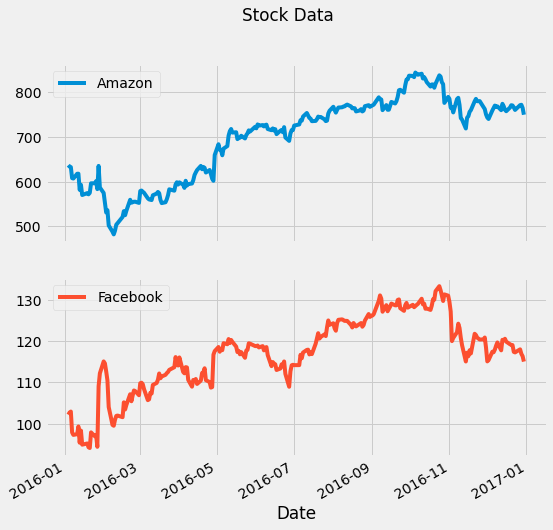

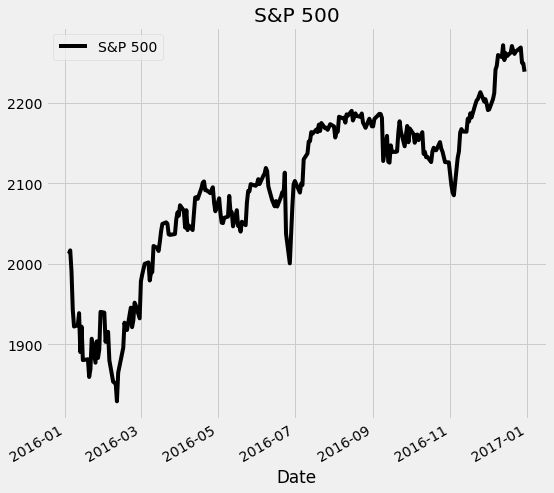

In [11]:
# lets visualize the Stock Market Data

plt.rcParams['figure.figsize'] = (8, 8)
stock_data.plot(subplots = True, title = 'Stock Data')
benchmark_data.plot(title = 'S&P 500', color = 'black')
plt.show()

### Sharpe Ratio: Starting with Daily Stock Returns

* The Sharpe Ratio uses the difference in returns between the two investment opportunities under consideration.

* However, our data show the historical value of each investment, not the return. To calculate the return, we need to calculate the percentage change in value from one day to the next. 

* We'll also take a look at the summary statistics because these will become our inputs as we calculate the Sharpe Ratio.

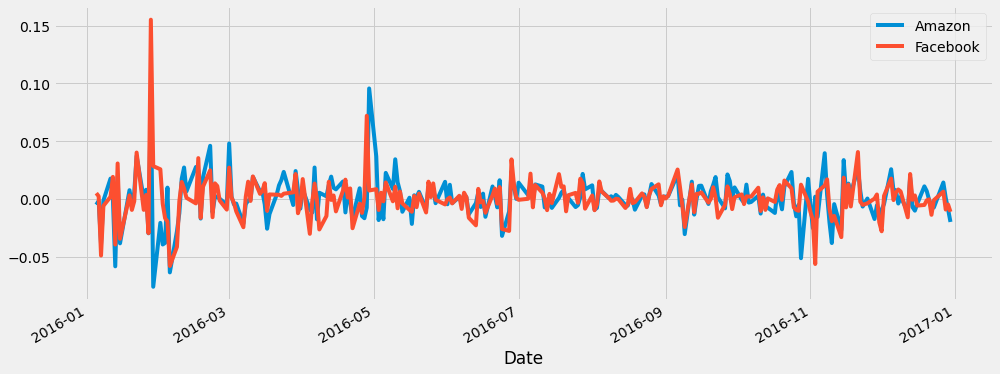

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


In [19]:
stock_returns = stock_data.pct_change()

plt.rcParams['figure.figsize'] = (15, 6)
stock_returns.plot()
plt.show()


stock_returns.describe()

count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

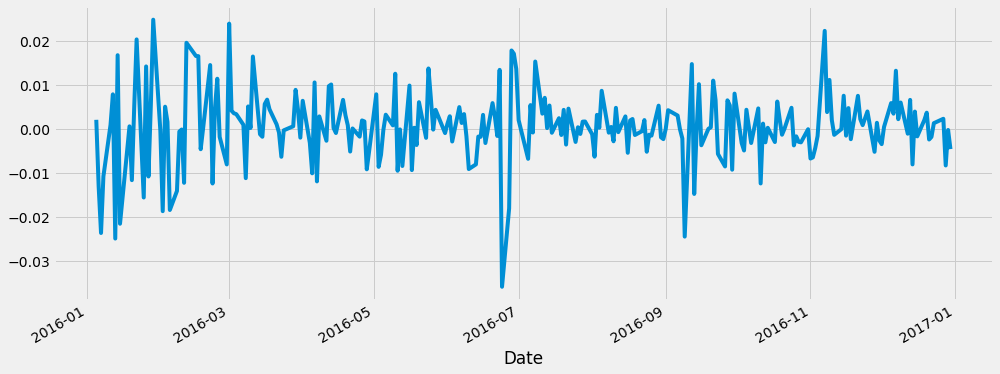

In [13]:
# calculate daily benchmark_data returns
sp_returns = benchmark_data['S&P 500'].pct_change()

# plot the daily returns
sp_returns.plot()

# summarize the daily returns
sp_returns.describe()

### Calculating Excess Returns for Amazon and Facebook vs. S&P 500
<p>Next, we need to calculate the relative performance of stocks vs. the S&amp;P 500 benchmark. This is calculated as the difference in returns between <code>stock_returns</code> and <code>sp_returns</code> for each day.</p>

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


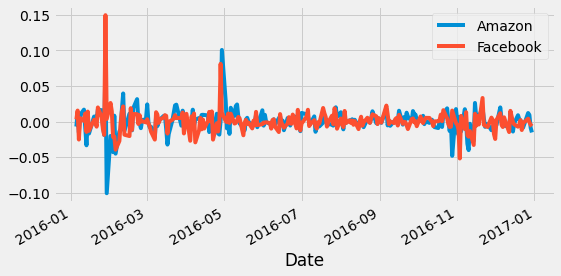

In [18]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis = 0)
excess_returns.plot()
excess_returns.describe()

### The Sharpe Ratio, Step 1: The Average Difference in Daily Returns Stocks vs S&P 500
<p>To compute Sharpe Ratio, First we need to calculate the average of the <code>excess_returns</code>. This tells us how much more or less the investment yields per day compared to the benchmark.</p>

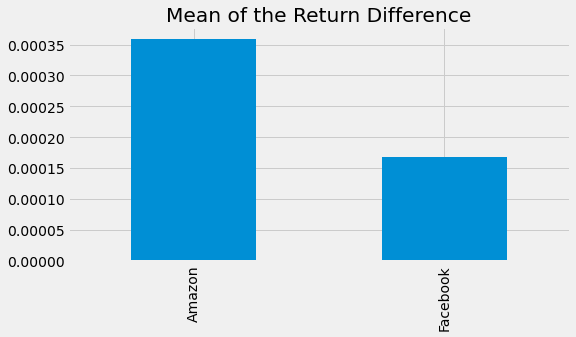

In [15]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
plt.rcParams['figure.figsize'] = (8,4)
avg_excess_return.plot.bar(title = 'Mean of the Return Difference')
plt.show()

### The Sharpe Ratio, Step 2: Standard Deviation of the Return Difference
<p>It looks like there was quite a bit of a difference between average daily returns for Amazon and Facebook.</p>
<p>Next, we calculate the standard deviation of the <code>excess_returns</code>. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&amp;P 500.</p>

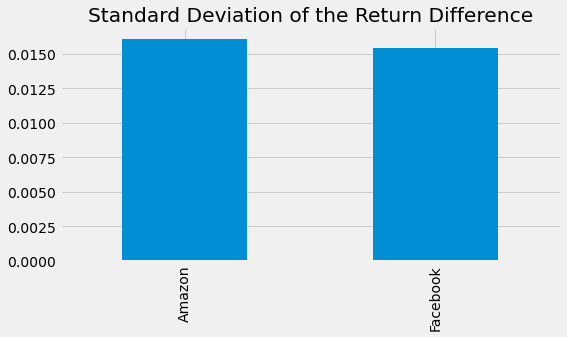

In [16]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
sd_excess_return.plot.bar(title = 'Standard Deviation of the Return Difference')
plt.show()

## 10. Putting it all together
<p>Now we just need to compute the ratio of <code>avg_excess_returns</code> and <code>sd_excess_returns</code>. The result is now finally the <em>Sharpe ratio</em> and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.</p>
<p>The Sharpe Ratio is often <em>annualized</em> by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days (5 days, 52 weeks, minus a few holidays): √252</p>

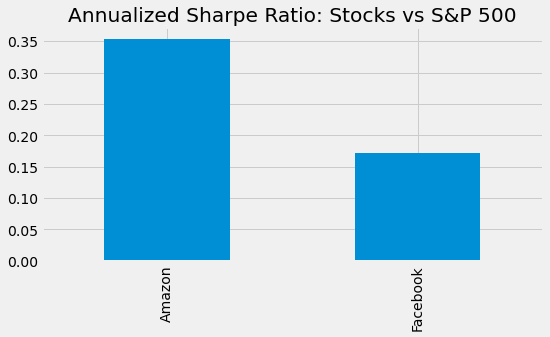

In [17]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot.bar(title = 'Annualized Sharpe Ratio: Stocks vs S&P 500')
plt.show()

## WE Conclude, that we should buy Amazon's Stock in place of Facebook

<p>Given the two Sharpe ratios, which investment should we go for? In 2016, Amazon had a Sharpe ratio twice as high as Facebook. This means that an investment in Amazon returned twice as much compared to the S&amp;P 500 for each unit of risk an investor would have assumed. In other words, in risk-adjusted terms, the investment in Amazon would have been more attractive.</p>
<p>This difference was mostly driven by differences in return rather than risk between Amazon and Facebook. The risk of choosing Amazon over FB (as measured by the standard deviation) was only slightly higher so that the higher Sharpe ratio for Amazon ends up higher mainly due to the higher average daily returns for Amazon. </p>
<p>When faced with investment alternatives that offer both different returns and risks, the Sharpe Ratio helps to make a decision by adjusting the returns by the differences in risk and allows an investor to compare investment opportunities on equal terms, that is, on an 'apples-to-apples' basis.</p>